# Historical NVT
Author: Evan Azevedo  
Amberdata

In [1]:
# load the packages
import os
import requests
import warnings
import datetime as dt
import json

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from dotenv import load_dotenv
import pandas_datareader as pdr

In [9]:
# helper functions
def get_key():
    "Get the API key from an .env file"
    if ".env" not in os.listdir("../"):
        print("Configuring API Key...")
        key = input("Amberdata API Key: ")
        with open("../.env", "w") as f:
            f.write(f"AMBERDATA_API_KEY={key}\n")
    load_dotenv(verbose=True)
    return {
        "AMBERDATA_API_KEY": os.getenv("AMBERDATA_API_KEY")
    }

def get_response(url, headers=None, queryString=None):
    "Get the REST response from the specified URL"
    if not headers:
        headers = {'x-api-key': api_key["AMBERDATA_API_KEY"]}
    if queryString:
        response = requests.request("GET", url, headers=headers, params=queryString)
    else:
        response = requests.request("GET", url, headers=headers)
    response = json.loads(response.text)
    try:
        if response["title"] == "OK":
            return response["payload"]
    except Exception:
        return None
    
api_key = get_key()

In [4]:
# our first token to try out
token = "btc"

# the url for our token
url = f"https://web3api.io/api/v2/market/metrics/{token}/historical/nvt"

# our API key
headers = {'x-api-key': api_key["AMBERDATA_API_KEY"]}

# the start and end of the period
end = dt.datetime.today().isoformat()
start = (dt.datetime.today() + dt.timedelta(-365)).isoformat()
print("Start:", start, "\n", "End:", end)

# a querystring, indicating the time period
querystring = {
    "startDate": start,
    "endDate": end,
    "timeFrame": "1d"
}

# get the response
response = get_response(url, headers)
print("\nFirst five lines of the result:")
for i in range(5):
    print(response["data"][i])

Start: 2019-07-29T16:39:06.131396 
 End: 2020-07-28T16:39:06.131341

First five lines of the result:
['2019-07-29T00:00:00.000Z', None, 8.891440666654463, None]
['2019-07-30T00:00:00.000Z', 10275.17, 9.005722597458128, 10.997232162343199]
['2019-07-31T00:00:00.000Z', 10285.6, 9.11470700155064, 10.95446307567473]
['2019-08-01T00:00:00.000Z', 10285.6, 10.675216972141232, 10.975267871630903]
['2019-08-02T00:00:00.000Z', 10285.61, 10.923781462275247, 10.984216494212934]


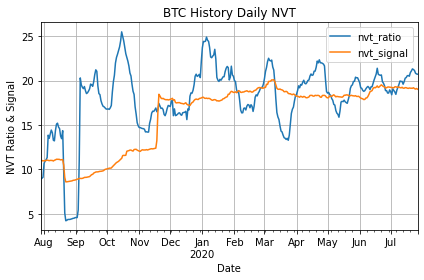

In [12]:
# load the data into a DataFrame and rename the columns
data = pd.DataFrame(response["data"]).rename({0: "date", 1: "price", 2: "nvt_ratio", 3: "nvt_signal"}, axis=1)
# turn the date column into datetime type
data["date"] = pd.to_datetime(data["date"])
# set the date as the index
data.set_index("date", inplace=True)

# plot the result
data[["nvt_ratio", "nvt_signal"]].plot()
plt.title(f"{token.upper()} History Daily NVT")
plt.ylabel("NVT Ratio & Signal")
plt.xlabel("Date")
plt.tight_layout()
plt.grid(True)
plt.savefig("../plots/btc_daily_nvt.png")
plt.show()

In [13]:
data.isna().sum()

price         1
nvt_ratio     0
nvt_signal    1
dtype: int64